In [ ]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns

Reading and cleaning data:

In [ ]:
data = pd.read_csv('property_rentals.csv',quoting=3, error_bad_lines=False)
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 59: expected 7 fields, saw 8\nSkipping line 136: expected 7 fields, saw 8\nSkipping line 329: expected 7 fields, saw 8\nSkipping line 340: expected 7 fields, saw 8\nSkipping line 344: expected 7 fields, saw 8\nSkipping line 550: expected 7 fields, saw 8\nSkipping line 610: expected 7 fields, saw 8\nSkipping line 637: expected 7 fields, saw 8\nSkipping line 775: expected 7 fields, saw 8\nSkipping line 797: expected 7 fields, saw 8\nSkipping line 845: expected 7 fields, saw 8\nSkipping line 957: expected 7 fields, saw 8\nSkipping line 958: expected 7 fields, saw 8\nSkipping line 1201: expected 7 fields, saw 8\nSkipping line 1236: expected 7 fields, saw 8\nSkipping line 1245: expected 7 fields, saw 8\nSkipping line 1266: expected 7 fields, 

,id,property_type,room_type,bathrooms,bedrooms,minimum_nights,price(in $)
0,958,Apartment,Entire home/apt,1.0,1.0,1,170
1,3850,House,Private room,1.0,1.0,1,99
2,5858,Apartment,Entire home/apt,1.0,2.0,30,235
3,7918,Apartment,Private room,4.0,1.0,32,65
4,8142,Apartment,Private room,4.0,1.0,32,65


In [ ]:
data.replace(to_replace = np.nan, value = 0)
data.rename(columns={'price(in $)':'price($)'},inplace=True)
data=data.drop(['id'], axis=1)

In [ ]:
data.nunique()

property_type      15
room_type           4
bathrooms          12
bedrooms            7
minimum_nights     37
price($)          333
dtype: int64

Analysing Data:

In [ ]:
data.groupby('property_type').mean()

,bathrooms,bedrooms,minimum_nights,price($)
property_type,,,,
Apartment,1.206044,1.309628,23.234973,189.098361
Bed and breakfast,6.600000,1.000000,1.050000,64.100000
Boutique hotel,1.200000,0.900000,2.700000,209.700000
Bungalow,1.083333,1.500000,17.666667,197.500000
Condominium,1.362000,1.584000,13.640000,272.920000
Cottage,1.000000,0.800000,8.400000,163.800000
Guest suite,1.028249,0.977401,7.570621,152.819209
Guesthouse,1.000000,0.833333,20.750000,139.166667
Hostel,2.187500,0.863636,6.500000,65.045455


In [ ]:
newdata_1= data.groupby('property_type').median()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd7e902d10>,
      dtype=object)

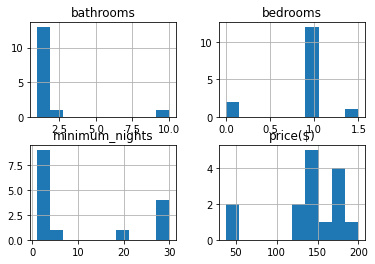

In [ ]:
newdata_1.hist()

In [ ]:
newdata_2=data.groupby('room_type').median()


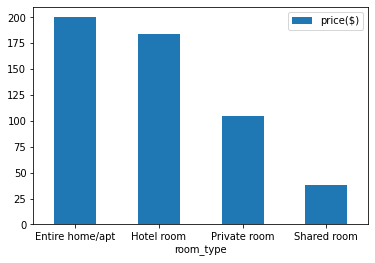

In [ ]:
newdata_2.plot.bar(y='price($)',rot=0)

Getting rid of Outliers:

  property_type        room_type  bathrooms  bedrooms  minimum_nights  \
0     Apartment  Entire home/apt        1.0       1.0               1   
1         House     Private room        1.0       1.0               1   
2     Apartment  Entire home/apt        1.0       2.0              30   
5         House  Entire home/apt        1.5       2.0               6   
6   Condominium     Private room        1.0       1.0               1   

   price($)  
0       170  
1        99  
2       235  
5       875  
6       139  


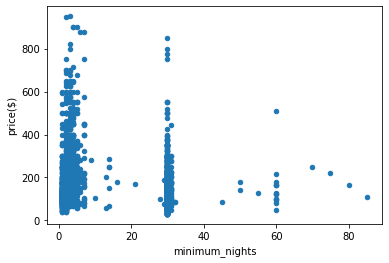

In [ ]:
q_hi=data["minimum_nights"].quantile(0.99)
q2_hi=data["price($)"].quantile(0.99)
q3_hi=data["bathrooms"].quantile(0.99)
q4_hi=data["bedrooms"].quantile(0.99)
data_filtered = data[(data["minimum_nights"] < q_hi) & (data["price($)"]<q2_hi) & (data["bathrooms"]<q3_hi) & (data["bedrooms"]<q4_hi)] 
print(data_filtered.head())
data_filtered.plot.scatter(x = 'minimum_nights', y = 'price($)');

Analysing relation between the Attributes given:

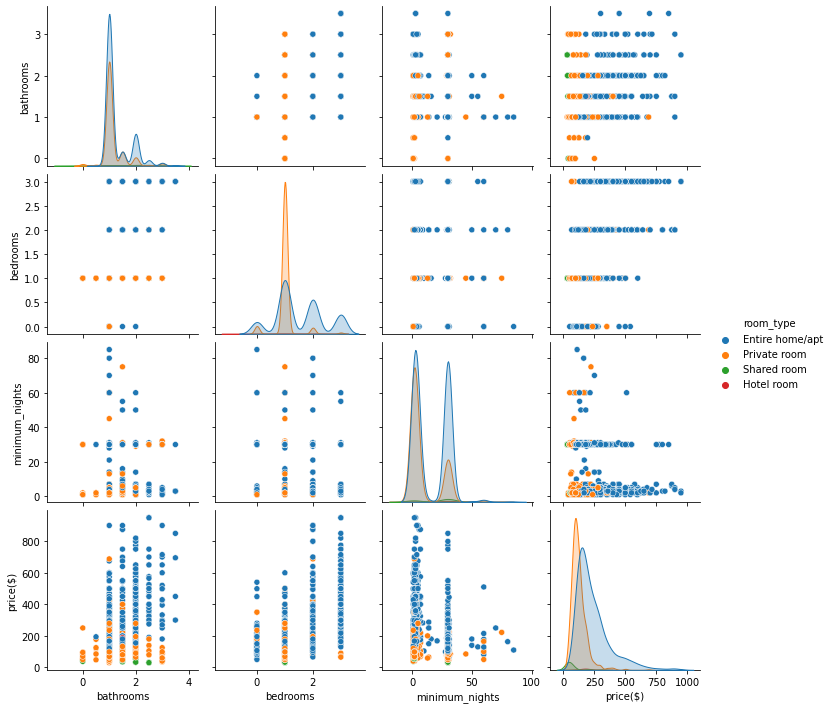

In [ ]:
sns.pairplot(data_filtered,hue='room_type')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


AxesSubplot(0.1,0.15;0.8x0.75)


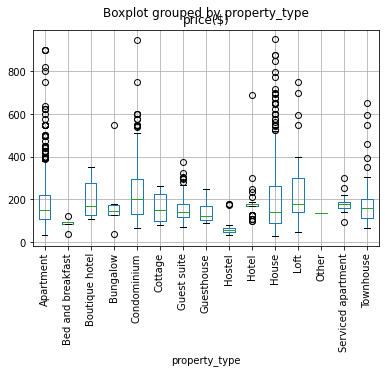

In [ ]:
print(data_filtered.boxplot(column='price($)',by='property_type',rot=90))

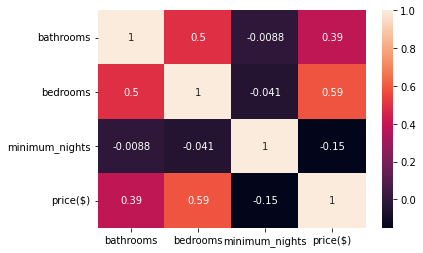

In [ ]:
correlation= data_filtered.corr()
sns.heatmap(correlation, xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

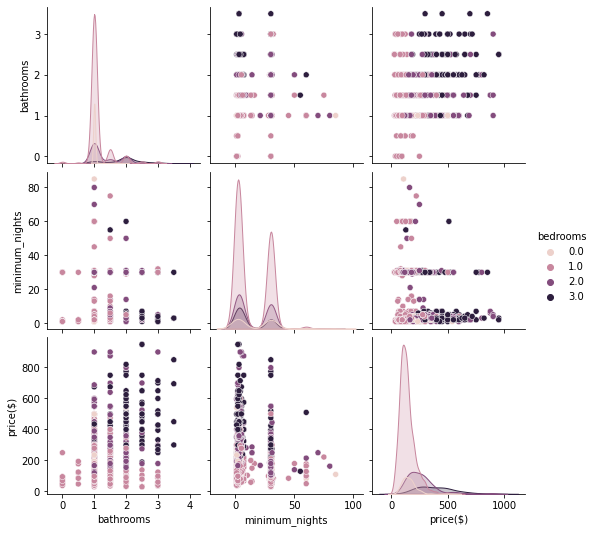

In [ ]:
sns.pairplot(data_filtered,hue='bedrooms')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
data_filtered['room_type'] = data_filtered['room_type'].replace(['Entire home/apt','Private room','Hotel room','Shared room'],['0','1','2','3'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train=data_filtered.drop(['price($)','property_type'],axis=1)
test=data_filtered['price($)']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(train,test,test_size=0.2,random_state=9)
regr=LinearRegression()
regr.fit(xtrain,ytrain)
pred=regr.predict(xtest)
regr.score(xtest,ytest)

0.5263358544220278